<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Model-Testing-with-numerical-features" data-toc-modified-id="Model-Testing-with-numerical-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Testing with numerical features</a></span><ul class="toc-item"><li><span><a href="#Finding-best-hyper-parameters" data-toc-modified-id="Finding-best-hyper-parameters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Finding best hyper-parameters</a></span></li><li><span><a href="#Comparing-Accuracies" data-toc-modified-id="Comparing-Accuracies-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Comparing Accuracies</a></span></li><li><span><a href="#%-of-Correct-Predictions-by-model" data-toc-modified-id="%-of-Correct-Predictions-by-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>% of Correct Predictions by model</a></span></li><li><span><a href="#Additional-feature-combination-testing" data-toc-modified-id="Additional-feature-combination-testing-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Additional feature combination testing</a></span></li></ul></li><li><span><a href="#Model-Testing-using-'Attribute_name'-as-a-feature" data-toc-modified-id="Model-Testing-using-'Attribute_name'-as-a-feature-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Testing using 'Attribute_name' as a feature</a></span><ul class="toc-item"><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data pre-processing</a></span></li><li><span><a href="#Finding-best-hyper-parameters" data-toc-modified-id="Finding-best-hyper-parameters-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Finding best hyper-parameters</a></span></li><li><span><a href="#Comparing-Accuracies" data-toc-modified-id="Comparing-Accuracies-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Comparing Accuracies</a></span></li><li><span><a href="#%-of-Correct-Predictions-by-model" data-toc-modified-id="%-of-Correct-Predictions-by-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>% of Correct Predictions by model</a></span></li></ul></li><li><span><a href="#Model-testing-using-'samples_1-5'" data-toc-modified-id="Model-testing-using-'samples_1-5'-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model testing using 'samples_1-5'</a></span><ul class="toc-item"><li><span><a href="#Finding-best-hyper-parameters" data-toc-modified-id="Finding-best-hyper-parameters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Finding best hyper-parameters</a></span></li><li><span><a href="#Comparing-Accuracies" data-toc-modified-id="Comparing-Accuracies-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Comparing Accuracies</a></span></li></ul></li><li><span><a href="#Model-testing-using-'Attribute_name'-+-'sample_1-5'" data-toc-modified-id="Model-testing-using-'Attribute_name'-+-'sample_1-5'-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model testing using 'Attribute_name' + 'sample_1-5'</a></span><ul class="toc-item"><li><span><a href="#Finding-best-hyper-parameters" data-toc-modified-id="Finding-best-hyper-parameters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Finding best hyper-parameters</a></span></li><li><span><a href="#Comparing-Accuracies" data-toc-modified-id="Comparing-Accuracies-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Comparing Accuracies</a></span></li></ul></li><li><span><a href="#Comparison-against-pandas-infer_dtype" data-toc-modified-id="Comparison-against-pandas-infer_dtype-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparison against pandas infer_dtype</a></span><ul class="toc-item"><li><span><a href="#Info-as-stated-by-the-pandas-docs:" data-toc-modified-id="Info-as-stated-by-the-pandas-docs:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Info as stated by the <em>pandas</em> docs:</a></span></li><li><span><a href="#Categories-as-pandas-types" data-toc-modified-id="Categories-as-pandas-types-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Categories as pandas types</a></span></li><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Numerical Features</a></span></li><li><span><a href="#Attribute-Name-Only" data-toc-modified-id="Attribute-Name-Only-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Attribute Name Only</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("data/needs_extraction_data/labelled_data.csv")

# Data Visualization

In [4]:
df.columns

Index(['Record_id', 'Attribute_name', 'y_pred', 'y_act', 'Reason',
       'total_vals', 'num_nans', '%_nans', 'mean_word_count',
       'std_dev_word_count', 'has_delimeters', 'sample_1', 'sample_2',
       'sample_3', 'sample_4', 'sample_5'],
      dtype='object')

In [5]:
labels = df['y_act'].unique()
for label in labels:
    print(f"- {label}: {len(df.loc[df.y_act == label])}")

- Date: 116
- Sentence: 87
- Custom Object: 122
- Unusable: 116
- URL: 28
- Numbers: 43
- List: 26
- Timestamp: 21


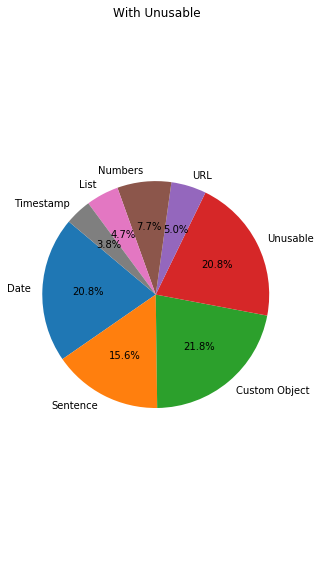

In [6]:
sizes = [len(df.loc[df.y_act == col]) for col in labels]
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('With Unusable')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

# Model Testing with numerical features 
Numerical representations:
- Date = 0
- Sentence = 1
- Custom Object = 2 
- Unusable = 3
- URL = 4
- Numbers = 5 
- List = 6 
- Timestamp = 7

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import neighbors
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn.metrics import confusion_matrix

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
def get_param_report(X, y, est, params, name):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)
    print(f"> Tuning hyper-parameters for {name}")
    print()

    clf = GridSearchCV(est, params, cv=5)
    clf.fit(X_train, y_train)

    print("> Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("> Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("> %0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("> Detailed classification report:")
    print()
    print("> The model is trained on the full development set.")
    print("> The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    

def get_pred_perc(model_list, folder):
    path = f'data/needs_extraction_data/classified_csvs/{folder}'
    acc = {}
    for model in model_list:
        df = pd.read_csv(f'{path}/{model}.csv')
        correct = len(df.loc[df.y_act == df.y_pred])
        acc[model] = (correct/len(df))*100
    return acc

In [9]:
from yellowbrick.classifier import ConfusionMatrix


def test_mult(x, y, clf, num=100):
    '''
    Test a model #NUM times

    :x: x-values
    :y: y-values
    :clf: classifier
    :num: # of times to be tested
    :returns: Average accuracy (rounded to 2 decimal places)
    '''
    acc_attempts = []
    x_train, x_test, y_train, y_test = 0,0,0,0
    for _ in range(num):
        x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=0.1)
        clf.fit(x_train, y_train)
        acc_attempts.append(clf.score(x_test, y_test)*100)
    return np.mean(acc_attempts)

df.loc[df.y_act == 'Date', 'y_act'] = 0
df.loc[df.y_act == 'Sentence', 'y_act'] = 1
df.loc[df.y_act == 'Custom Object', 'y_act'] = 2
df.loc[df.y_act == 'Unusable', 'y_act'] = 3
df.loc[df.y_act == 'URL', 'y_act'] = 4
df.loc[df.y_act == 'Numbers', 'y_act'] = 5
df.loc[df.y_act == 'List', 'y_act'] = 6
df.loc[df.y_act == 'Timestamp', 'y_act'] = 7

x = np.array(df.drop(['Record_id', 'Attribute_name', 'y_pred', 'y_act', 
                     'Reason', 'total_vals', 'num_nans', '%_nans',
                     'sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5'], axis=1))
y = df['y_act']

## Finding best hyper-parameters

In [10]:
sep = "================================================================"
# KNN
clf = neighbors.KNeighborsClassifier()
params = [{'n_neighbors': [5, 50, 100, 150], 'algorithm': [
    'ball_tree', 'kd_tree'], 'leaf_size': [10, 20, 30, 50, 100]}]
get_param_report(x, y, clf, params, 'KNN')
print(sep)

# SVM
clf = svm.SVC()
params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
           'C': [1, 10, 100]}, {'kernel': ['linear'], 'C': [1, 10, 100]}]
get_param_report(x, y, clf, params, 'SVM')
print(sep)

# Decision Tree
clf = tree.DecisionTreeClassifier()
params = {'splitter': ['best', 'random'], 'max_depth': [
    30, 50, 100, 500], 'min_samples_split': [2, 10, 50, 100]}
get_param_report(x, y, clf, params, 'Decision Tree')
print(sep)

# Random Forest
clf = ensemble.RandomForestClassifier()
params = {'n_estimators': [5, 10, 50], 'criterion': [
    'gini', 'entropy'], 'max_depth': [30, 50, 100, 500, 1000]}
get_param_report(x, y, clf, params, 'Random Forest')
print(sep)

# Logistic Regression
clf = linear_model.LogisticRegression()
params = {'penalty': ['l1', 'l2'], 'C': [1.0, 1.5, 2.0]}
get_param_report(x, y, clf, params, 'Random Forest')
print(sep)

> Tuning hyper-parameters for KNN

> Best parameters set found on development set:

{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 5}

> Grid scores on development set:

> 0.495 (+/-0.111) for {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5}
> 0.516 (+/-0.061) for {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 50}
> 0.401 (+/-0.086) for {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 100}
> 0.280 (+/-0.104) for {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 150}
> 0.527 (+/-0.126) for {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5}
> 0.520 (+/-0.066) for {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 50}
> 0.398 (+/-0.095) for {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 100}
> 0.283 (+/-0.100) for {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 150}
> 0.584 (+/-0.029) for {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 5}
> 0.523 (+/-0.055) for {'algorithm': 'ball_

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

> Grid scores on development set:

> 0.341 (+/-0.061) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.244 (+/-0.012) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.441 (+/-0.093) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.312 (+/-0.087) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.520 (+/-0.039) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.419 (+/-0.098) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.552 (+/-0.098) for {'C': 1, 'kernel': 'linear'}
> 0.548 (+/-0.084) for {'C': 10, 'kernel': 'linear'}
> 0.573 (+/-0.062) for {'C': 100, 'kernel': 'linear'}

> Detailed classification report:

> The model is trained on the full development set.
> The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.48      0.89      0.62        57
          1       0.75      0.93      0.83        42
          2       0.79 

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> Best parameters set found on development set:

{'max_depth': 100, 'min_samples_split': 2, 'splitter': 'best'}

> Grid scores on development set:

> 0.595 (+/-0.073) for {'max_depth': 30, 'min_samples_split': 2, 'splitter': 'best'}
> 0.570 (+/-0.082) for {'max_depth': 30, 'min_samples_split': 2, 'splitter': 'random'}
> 0.581 (+/-0.035) for {'max_depth': 30, 'min_samples_split': 10, 'splitter': 'best'}
> 0.552 (+/-0.074) for {'max_depth': 30, 'min_samples_split': 10, 'splitter': 'random'}
> 0.538 (+/-0.032) for {'max_depth': 30, 'min_samples_split': 50, 'splitter': 'best'}
> 0.498 (+/-0.057) for {'max_depth': 30, 'min_samples_split': 50, 'splitter': 'random'}
> 0.498 (+/-0.057) for {'max_depth': 30, 'min_samples_split': 100, 'splitter': 'best'}
> 0.405 (+/-0.121) for {'max_depth': 30, 'min_samples_split': 100, 'splitter': 'random'}
> 0.606 (+/-0.044) for {'max_depth': 50, 'min_samples_split': 2, 'splitter': 'best'}
> 0.570 (+/-0.060) for {'max_depth': 50, 'min_samples_split': 2, 'split

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> Best parameters set found on development set:

{'C': 1.5, 'penalty': 'l1'}

> Grid scores on development set:

> 0.563 (+/-0.096) for {'C': 1.0, 'penalty': 'l1'}
> 0.563 (+/-0.097) for {'C': 1.0, 'penalty': 'l2'}
> 0.570 (+/-0.087) for {'C': 1.5, 'penalty': 'l1'}
> 0.563 (+/-0.097) for {'C': 1.5, 'penalty': 'l2'}
> 0.570 (+/-0.087) for {'C': 2.0, 'penalty': 'l1'}
> 0.566 (+/-0.098) for {'C': 2.0, 'penalty': 'l2'}

> Detailed classification report:

> The model is trained on the full development set.
> The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.46      0.88      0.61        57
          1       0.65      0.93      0.76        42
          2       0.71      0.56      0.63        62
          3       0.57      0.57      0.57        63
          4       0.00      0.00      0.00        17
          5       0.00      0.00      0.00        24
          6       0.00      0.00      0.00        10
          7  

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
accuracy = {}

# KNN
clf = neighbors.KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, n_neighbors=5)
accuracy['knn'] = test_mult(x, y, clf, 100)

# SVM
clf = svm.SVC(C=100, kernel='rbf')
accuracy['svm'] = test_mult(x, y, clf, 100)

# Decision Tree
clf = tree.DecisionTreeClassifier(max_depth=500, min_samples_split=2, splitter='best')
accuracy['dt'] = test_mult(x, y, clf, 100)

# Random Forest
clf = ensemble.RandomForestClassifier(criterion='gini', max_depth=30, n_estimators=10)
accuracy['rf'] = test_mult(x, y, clf, 100)

# Logistic Regression
clf = linear_model.LogisticRegression(C=1.0, penalty='l1')
accuracy['lr'] = test_mult(x, y, clf, 100)

# Naive Bayes (Gaussian)
clf = naive_bayes.GaussianNB()
accuracy['nb_g'] = test_mult(x, y, clf, 100)

# Naive Bayes (Bernoulli)
clf = naive_bayes.BernoulliNB()
accuracy['nb_b'] = test_mult(x, y, clf, 100)

# Naive Bayes (Multi)
clf = naive_bayes.MultinomialNB()
accuracy['nb_m'] = test_mult(x, y, clf, 100)

## Comparing Accuracies

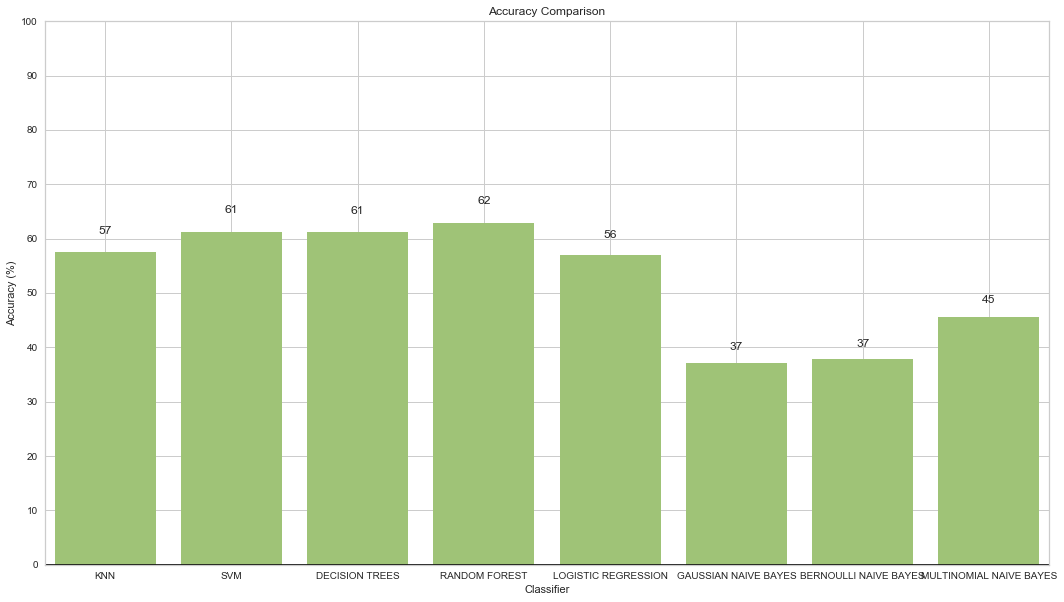

In [12]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
ind = np.arange(8)

plt.figure(figsize=(18, 10))

accbars = plt.bar(ind, [accuracy[value] for value in accuracy], color='g')
plt.axhline(0, color='black')
plt.margins(0.01)
plt.title('Accuracy Comparison')
plt.xticks(ind,('KNN', 'SVM', 'DECISION TREES', 'RANDOM FOREST', 'LOGISTIC REGRESSION', 'GAUSSIAN NAIVE BAYES', 'BERNOULLI NAIVE BAYES', 'MULTINOMIAL NAIVE BAYES'))
plt.yticks(np.linspace(0, 100, num=11))
plt.ylabel('Accuracy (%)')
plt.xlabel('Classifier')

autolabel(accbars)

plt.show()

## % of Correct Predictions by model

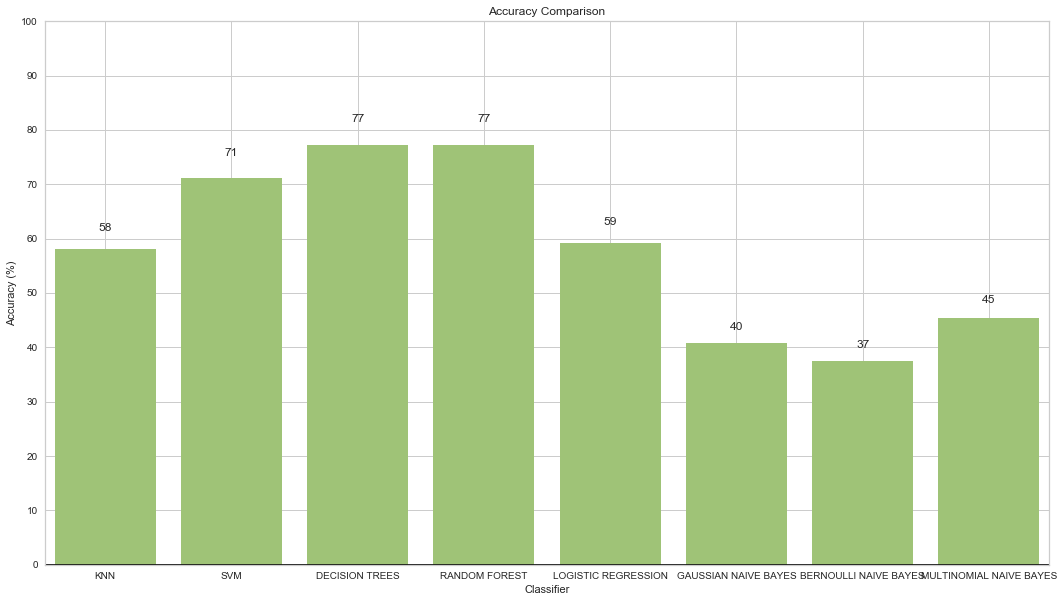

In [13]:
model_list = ['knn', 'svm', 'decision_tree', 'random_forest', 'logistic_regression',
              'gauss_naive_bayes', 'bern_naive_bayes', 'multinomial_naive_bayes']
accuracy_perc_num = get_pred_perc(model_list, 'numerical_features_only')
ind = np.arange(8)

plt.figure(figsize=(18, 10))

accbars = plt.bar(ind, [accuracy_perc_num[value] for value in accuracy_perc_num], color='g')
plt.axhline(0, color='black')
plt.margins(0.01)
plt.title('Accuracy Comparison')
plt.xticks(ind, ('KNN', 'SVM', 'DECISION TREES', 'RANDOM FOREST', 'LOGISTIC REGRESSION',
                 'GAUSSIAN NAIVE BAYES', 'BERNOULLI NAIVE BAYES', 'MULTINOMIAL NAIVE BAYES'))
plt.yticks(np.linspace(0, 100, num=11))
plt.ylabel('Accuracy (%)')
plt.xlabel('Classifier')

autolabel(accbars)

plt.show()

## Additional feature combination testing

Features being used:
- mean_word_count
- std_word_count
- has_delimiters

In [14]:
import itertools


def get_combs(iterable):
    combs = []
    for count in range(1, len(iterable)):
        for comb in itertools.combinations(iterable, count):
            combs.append(comb)
    return combs


def test_combs(combs, comb_names):
    accuracy = {}
    for name in comb_names:
        accuracy[name] = {}
        for comb in combs:
            x = np.array(df.drop(['Record_id', 'Attribute_name', 'y_pred', 'y_act',
                                  'Reason', 'total_vals', 'num_nans', '%_nans',
                                  'sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5'] + list(comb), axis=1))
            # KNN
            clf = neighbors.KNeighborsClassifier(
                algorithm='ball_tree', leaf_size=30, n_neighbors=5)
            accuracy[name]['knn'] = test_mult(x, y, clf, 100)

            # SVM
            clf = svm.SVC(C=100, kernel='rbf')
            accuracy[name]['svm'] = test_mult(x, y, clf, 100)

            # Decision Tree
            clf = tree.DecisionTreeClassifier(
                max_depth=500, min_samples_split=2, splitter='best')
            accuracy[name]['dt'] = test_mult(x, y, clf, 100)

            # Random Forest
            clf = ensemble.RandomForestClassifier(
                criterion='gini', max_depth=30, n_estimators=10)
            accuracy[name]['rf'] = test_mult(x, y, clf, 100)

            # Logistic Regression
            clf = linear_model.LogisticRegression(C=1.0, penalty='l1')
            accuracy[name]['lr'] = test_mult(x, y, clf, 100)

            # Naive Bayes (Gaussian)
            clf = naive_bayes.GaussianNB()
            accuracy[name]['nb_g'] = test_mult(x, y, clf, 100)

            # Naive Bayes (Bernoulli)
            clf = naive_bayes.BernoulliNB()
            accuracy[name]['nb_b'] = test_mult(x, y, clf, 100)

            # Naive Bayes (Multi)
            clf = naive_bayes.MultinomialNB()
            accuracy[name]['nb_m'] = test_mult(x, y, clf, 100)
    return accuracy

In [15]:
feats = ['mean_word_count', 'std_dev_word_count', 'has_delimeters']
comb_names = ['STDEV+HAS_DEL','MEAN+HAS_DEL','MEAN+STDEV','HAS_DEL','STDEV','MEAN']
combs = get_combs(feats)
accs = test_combs(combs, comb_names)

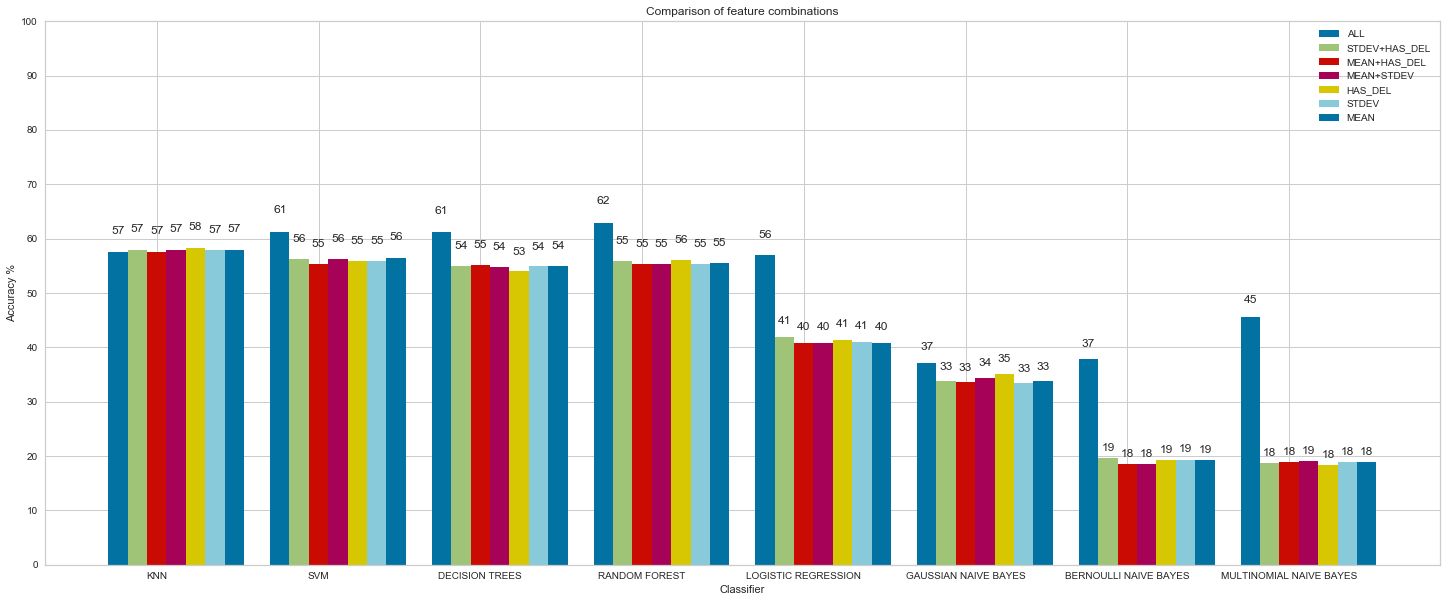

In [16]:
model_list = ['knn', 'svm', 'decision_tree', 'random_forest', 'logistic_regression',
              'gauss_naive_bayes', 'bern_naive_bayes', 'multinomial_naive_bayes']

ind = np.arange(8)
width = 0.12
fig, ax = plt.subplots(figsize=(25, 10))

bar_all = ax.bar(ind, [accuracy[value] for value in accuracy], width)
bar_stddel = ax.bar(ind+width, [float(x[1])
                                for x in accs[comb_names[0]].items()], width)
bar_meandel = ax.bar(ind+width*2, [float(x[1])
                                   for x in accs[comb_names[1]].items()], width)
bar_meanstd = ax.bar(ind+width*3, [float(x[1])
                                   for x in accs[comb_names[2]].items()], width)
bar_del = ax.bar(ind+width*4, [float(x[1])
                               for x in accs[comb_names[3]].items()], width)
bar_std = ax.bar(ind+width*5, [float(x[1])
                               for x in accs[comb_names[4]].items()], width)
bar_mean = ax.bar(ind+width*6, [float(x[1])
                                for x in accs[comb_names[5]].items()], width)

ax.set_title('Comparison of feature combinations')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Classifier')
ax.set_xticks(ind + width*2)
ax.set_yticks(np.linspace(0, 100, num=11))
ax.set_xticklabels(['KNN', 'SVM', 'DECISION TREES', 'RANDOM FOREST', 'LOGISTIC REGRESSION',
                    'GAUSSIAN NAIVE BAYES', 'BERNOULLI NAIVE BAYES', 'MULTINOMIAL NAIVE BAYES'])

ax.legend((bar_all[0], bar_stddel[0], bar_meandel[0], bar_meanstd[0], bar_del[0], bar_std[0],
           bar_mean[0]), ('ALL', 'STDEV+HAS_DEL', 'MEAN+HAS_DEL', 'MEAN+STDEV', 'HAS_DEL', 'STDEV', 'MEAN'))
autolabel(bar_all)
autolabel(bar_stddel)
autolabel(bar_meandel)
autolabel(bar_meanstd)
autolabel(bar_del)
autolabel(bar_std)
autolabel(bar_mean)
plt.show()

# Model Testing using 'Attribute_name' as a feature

In [17]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [18]:
def test_mult(x, y, clf, num=100):
    '''
    Test a model #NUM times

    :x: x-values
    :y: y-values
    :clf: classifier
    :num: # of times to be tested
    :returns: Average accuracy (rounded to 2 decimal places)
    '''
    acc_attempts = []
    x_train, x_test, y_train, y_test = 0,0,0,0
    for _ in range(num):
        x_train, x_test, y_train, y_test = train_test_split(
            x, y)
        Tfidf_vect = TfidfVectorizer()
        Tfidf_vect.fit(df['text_final'])
        
        Train_X_Tfidf = Tfidf_vect.transform(x_train)
        Test_X_Tfidf = Tfidf_vect.transform(x_test)
        clf.fit(Train_X_Tfidf, y_train)
        acc_attempts.append(clf.score(Test_X_Tfidf, y_test)*100)
    return np.mean(acc_attempts)


def get_param_report(X, y, est, params, name):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)
    print(f"> Tuning hyper-parameters for {name}")
    print()
    
    Tfidf_vect = TfidfVectorizer()
    Tfidf_vect.fit(df['text_final'])
    Train_X_Tfidf = Tfidf_vect.transform(X_train)
    Test_X_Tfidf = Tfidf_vect.transform(X_test)
        
    clf = GridSearchCV(est, params, cv=5)
    clf.fit(Train_X_Tfidf, y_train)

    print("> Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("> Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("> %0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("> Detailed classification report:")
    print()
    print("> The model is trained on the full development set.")
    print("> The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(Test_X_Tfidf)
    print(classification_report(y_true, y_pred))
    print()

## Data pre-processing

In [19]:
df['Corpus'] = [" ".join(entry.lower().split('_')) for entry in df['Attribute_name']]
df['Corpus']= [word_tokenize(entry) for entry in df['Corpus']]

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['Corpus']):
    final_words = []
    # Initializing WordNetLemmatizer()
    word_lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_lemmatized.lemmatize(word,tag_map[tag[0]])
            final_words.append(word_Final)
    df.loc[index,'text_final'] = str(final_words)

x = df['text_final']
y = df['y_act']

## Finding best hyper-parameters

In [20]:
sep = "================================================================"
# SVM
clf = svm.SVC()
params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
           'C': [1, 10, 100]}, {'kernel': ['linear'], 'C': [1, 10, 100]}]
get_param_report(x, y, clf, params, 'SVM')
print(sep)

# Decision Tree
clf = tree.DecisionTreeClassifier()
params = {'splitter': ['best', 'random'], 'max_depth': [
    30, 50, 100, 500], 'min_samples_split': [2, 10, 50, 100]}
get_param_report(x, y, clf, params, 'Decision Tree')
print(sep)

# Random Forest
clf = ensemble.RandomForestClassifier()
params = {'n_estimators': [5, 10, 50], 'criterion': [
    'gini', 'entropy'], 'max_depth': [30, 50, 100, 500, 1000]}
get_param_report(x, y, clf, params, 'Random Forest')
print(sep)

# Logistic Regression
clf = linear_model.LogisticRegression()
params = {'penalty': ['l1', 'l2'], 'C': [1.0, 1.5, 2.0]}
get_param_report(x, y, clf, params, 'Logistic Regression')
print(sep)

> Tuning hyper-parameters for SVM

> Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

> Grid scores on development set:

> 0.244 (+/-0.130) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.244 (+/-0.130) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.244 (+/-0.130) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.244 (+/-0.130) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.477 (+/-0.114) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.244 (+/-0.130) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.670 (+/-0.147) for {'C': 1, 'kernel': 'linear'}
> 0.677 (+/-0.116) for {'C': 10, 'kernel': 'linear'}
> 0.677 (+/-0.116) for {'C': 100, 'kernel': 'linear'}

> Detailed classification report:

> The model is trained on the full development set.
> The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.93      0.70      0.80        57
          1       0.69      0.52      0.59

> Best parameters set found on development set:

{'C': 2.0, 'penalty': 'l2'}

> Grid scores on development set:

> 0.631 (+/-0.131) for {'C': 1.0, 'penalty': 'l1'}
> 0.663 (+/-0.190) for {'C': 1.0, 'penalty': 'l2'}
> 0.656 (+/-0.157) for {'C': 1.5, 'penalty': 'l1'}
> 0.670 (+/-0.183) for {'C': 1.5, 'penalty': 'l2'}
> 0.677 (+/-0.155) for {'C': 2.0, 'penalty': 'l1'}
> 0.681 (+/-0.170) for {'C': 2.0, 'penalty': 'l2'}

> Detailed classification report:

> The model is trained on the full development set.
> The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.87      0.70      0.78        57
          1       0.70      0.55      0.61        42
          2       0.79      0.50      0.61        62
          3       0.47      0.87      0.61        63
          4       1.00      0.88      0.94        17
          5       1.00      0.62      0.77        24
          6       0.33      0.20      0.25        10
          7  

In [21]:
accuracy = {}

# KNN
clf = neighbors.KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, n_neighbors=5)
accuracy['knn'] = test_mult(x, y, clf, 100)

# SVM
clf = svm.SVC(C=10, kernel='linear')
accuracy['svm'] = test_mult(x, y, clf, 100)

# Decision Tree
clf = tree.DecisionTreeClassifier(max_depth=50, min_samples_split=10, splitter='random')
accuracy['dt'] = test_mult(x, y, clf, 100)

# Random Forest
clf = ensemble.RandomForestClassifier(criterion='entropy', max_depth=500, n_estimators=50)
accuracy['rf'] = test_mult(x, y, clf, 100)

# Logistic Regression
clf = linear_model.LogisticRegression(C=2.0, penalty='l2')
accuracy['lr'] = test_mult(x, y, clf, 100)

# Naive Bayes (Bernoulli)
clf = naive_bayes.BernoulliNB()
accuracy['nb_b'] = test_mult(x, y, clf, 100)

# Naive Bayes (Multi)
clf = naive_bayes.MultinomialNB()
accuracy['nb_m'] = test_mult(x, y, clf, 100)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


## Comparing Accuracies

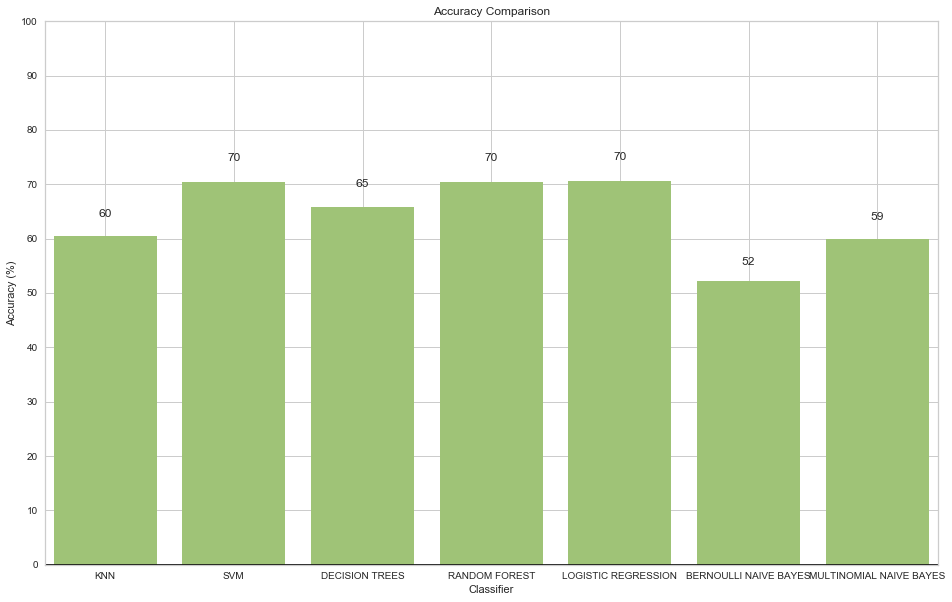

In [22]:
ind = np.arange(7)

plt.figure(figsize=(16, 10))

accbars = plt.bar(ind, [accuracy[value] for value in accuracy], color='g')
plt.axhline(0, color='black')
plt.margins(0.01)
plt.title('Accuracy Comparison')
plt.xticks(ind,('KNN', 'SVM', 'DECISION TREES', 'RANDOM FOREST', 'LOGISTIC REGRESSION', 'BERNOULLI NAIVE BAYES', 'MULTINOMIAL NAIVE BAYES'))
plt.yticks(np.linspace(0, 100, num=11))
plt.ylabel('Accuracy (%)')
plt.xlabel('Classifier')

autolabel(accbars)

plt.show()

## % of Correct Predictions by model

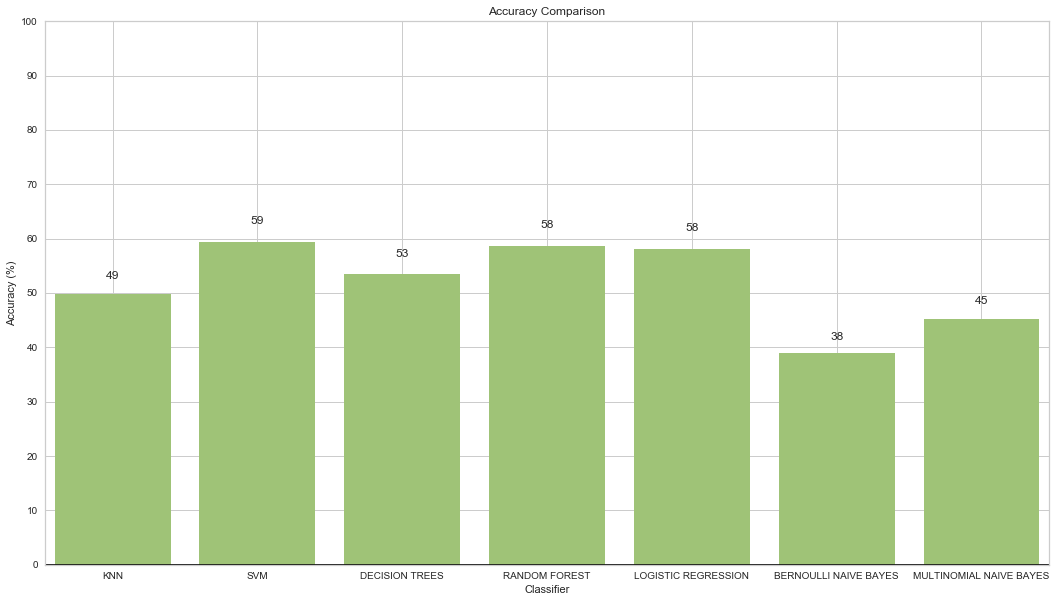

In [36]:
model_list = ['knn', 'svm', 'decision_tree', 'random_forest',
              'logistic_regression', 'bern_naive_bayes', 'multinomial_naive_bayes']
accuracy_perc_att = get_pred_perc(model_list, 'attribute_name_only')
ind = np.arange(7)

plt.figure(figsize=(18, 10))

accbars = plt.bar(ind, [accuracy_perc_att[value]
                        for value in accuracy_perc_att], color='g')
plt.axhline(0, color='black')
plt.margins(0.01)
plt.title('Accuracy Comparison')
plt.xticks(ind, ('KNN', 'SVM', 'DECISION TREES', 'RANDOM FOREST',
                 'LOGISTIC REGRESSION', 'BERNOULLI NAIVE BAYES', 'MULTINOMIAL NAIVE BAYES'))
plt.yticks(np.linspace(0, 100, num=11))
plt.ylabel('Accuracy (%)')
plt.xlabel('Classifier')

autolabel(accbars)

plt.show()

# Model testing using 'samples_1-5'

In [23]:
cut = df.drop(['Record_id', 'Attribute_name', 'y_pred', 'y_act', 'mean_word_count', 'std_dev_word_count', 'has_delimeters',
               'Reason', 'total_vals', 'num_nans', '%_nans', 'Attribute_name'], axis=1)
df['Corpus'] = [f'{row[1]} {row[2]} {row[3]} {row[4]} {row[5]}' for row in cut.itertuples()]
df['Corpus'] = [word_tokenize(entry) for entry in df['Corpus']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index, entry in enumerate(df['Corpus']):
    final_words = []
    word_lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalnum() :
            word_Final = word_lemmatized.lemmatize(word, tag_map[tag[0]])
            final_words.append(word_Final)
    df.loc[index, 'text_final'] = str(final_words)

x = df['text_final']
y = df['y_act']

## Finding best hyper-parameters

In [24]:
sep = "================================================================"
# SVM
clf = svm.SVC()
params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
           'C': [1, 10, 100]}, {'kernel': ['linear'], 'C': [1, 10, 100]}]
get_param_report(x, y, clf, params, 'SVM')
print(sep)

# Decision Tree
clf = tree.DecisionTreeClassifier()
params = {'splitter': ['best', 'random'], 'max_depth': [
    30, 50, 100, 500], 'min_samples_split': [2, 10, 50, 100]}
get_param_report(x, y, clf, params, 'Decision Tree')
print(sep)

# Random Forest
clf = ensemble.RandomForestClassifier()
params = {'n_estimators': [5, 10, 50], 'criterion': [
    'gini', 'entropy'], 'max_depth': [30, 50, 100, 500, 1000]}
get_param_report(x, y, clf, params, 'Random Forest')
print(sep)

# Logistic Regression
clf = linear_model.LogisticRegression()
params = {'penalty': ['l1', 'l2'], 'C': [1.0, 1.5, 2.0]}
get_param_report(x, y, clf, params, 'Logistic Regression')
print(sep)

> Tuning hyper-parameters for SVM

> Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

> Grid scores on development set:

> 0.211 (+/-0.011) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.211 (+/-0.011) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.211 (+/-0.011) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.211 (+/-0.011) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.423 (+/-0.034) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.211 (+/-0.011) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.473 (+/-0.092) for {'C': 1, 'kernel': 'linear'}
> 0.498 (+/-0.089) for {'C': 10, 'kernel': 'linear'}
> 0.498 (+/-0.089) for {'C': 100, 'kernel': 'linear'}

> Detailed classification report:

> The model is trained on the full development set.
> The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.29      0.86      0.44        57
          1       1.00      0.31      0.47

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> Best parameters set found on development set:

{'max_depth': 30, 'min_samples_split': 50, 'splitter': 'random'}

> Grid scores on development set:

> 0.527 (+/-0.091) for {'max_depth': 30, 'min_samples_split': 2, 'splitter': 'best'}
> 0.530 (+/-0.110) for {'max_depth': 30, 'min_samples_split': 2, 'splitter': 'random'}
> 0.527 (+/-0.128) for {'max_depth': 30, 'min_samples_split': 10, 'splitter': 'best'}
> 0.516 (+/-0.095) for {'max_depth': 30, 'min_samples_split': 10, 'splitter': 'random'}
> 0.520 (+/-0.122) for {'max_depth': 30, 'min_samples_split': 50, 'splitter': 'best'}
> 0.541 (+/-0.135) for {'max_depth': 30, 'min_samples_split': 50, 'splitter': 'random'}
> 0.480 (+/-0.131) for {'max_depth': 30, 'min_samples_split': 100, 'splitter': 'best'}
> 0.495 (+/-0.141) for {'max_depth': 30, 'min_samples_split': 100, 'splitter': 'random'}
> 0.513 (+/-0.097) for {'max_depth': 50, 'min_samples_split': 2, 'splitter': 'best'}
> 0.541 (+/-0.120) for {'max_depth': 50, 'min_samples_split': 2, 'spl

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 10}

> Grid scores on development set:

> 0.430 (+/-0.190) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 5}
> 0.523 (+/-0.099) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 10}
> 0.516 (+/-0.138) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 50}
> 0.509 (+/-0.143) for {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 5}
> 0.516 (+/-0.080) for {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 10}
> 0.513 (+/-0.118) for {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 50}
> 0.520 (+/-0.069) for {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 5}
> 0.516 (+/-0.081) for {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 10}
> 0.516 (+/-0.120) for {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 50}
> 0.505 (+/-0.099) for {'criterion': 'gini', 'max_depth': 500, 'n_estimators': 5}
> 0.530 (+/-0.130) for {'criterio

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> Best parameters set found on development set:

{'C': 2.0, 'penalty': 'l2'}

> Grid scores on development set:

> 0.452 (+/-0.051) for {'C': 1.0, 'penalty': 'l1'}
> 0.509 (+/-0.097) for {'C': 1.0, 'penalty': 'l2'}
> 0.480 (+/-0.058) for {'C': 1.5, 'penalty': 'l1'}
> 0.491 (+/-0.081) for {'C': 1.5, 'penalty': 'l2'}
> 0.470 (+/-0.049) for {'C': 2.0, 'penalty': 'l1'}
> 0.559 (+/-0.171) for {'C': 2.0, 'penalty': 'l2'}

> Detailed classification report:

> The model is trained on the full development set.
> The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.37      0.88      0.52        57
          1       0.90      0.67      0.77        42
          2       0.84      0.42      0.56        62
          3       0.81      0.86      0.83        63
          4       1.00      0.82      0.90        17
          5       1.00      0.04      0.08        24
          6       0.00      0.00      0.00        10
          7  

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
accuracy = {}

# KNN
clf = neighbors.KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, n_neighbors=5)
accuracy['knn'] = test_mult(x, y, clf, 100)

# SVM
clf = svm.SVC(C=10, kernel='linear')
accuracy['svm'] = test_mult(x, y, clf, 100)

# Decision Tree
clf = tree.DecisionTreeClassifier(max_depth=50, min_samples_split=10, splitter='random')
accuracy['dt'] = test_mult(x, y, clf, 100)

# Random Forest
clf = ensemble.RandomForestClassifier(criterion='entropy', max_depth=500, n_estimators=5)
accuracy['rf'] = test_mult(x, y, clf, 100)

# Logistic Regression
clf = linear_model.LogisticRegression(C=2.0, penalty='l2')
accuracy['lr'] = test_mult(x, y, clf, 100)

# Naive Bayes (Bernoulli)
clf = naive_bayes.BernoulliNB()
accuracy['nb_b'] = test_mult(x, y, clf, 100)

# Naive Bayes (Multi)
clf = naive_bayes.MultinomialNB()

accuracy['nb_m'] = test_mult(x, y, clf, 100)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


## Comparing Accuracies

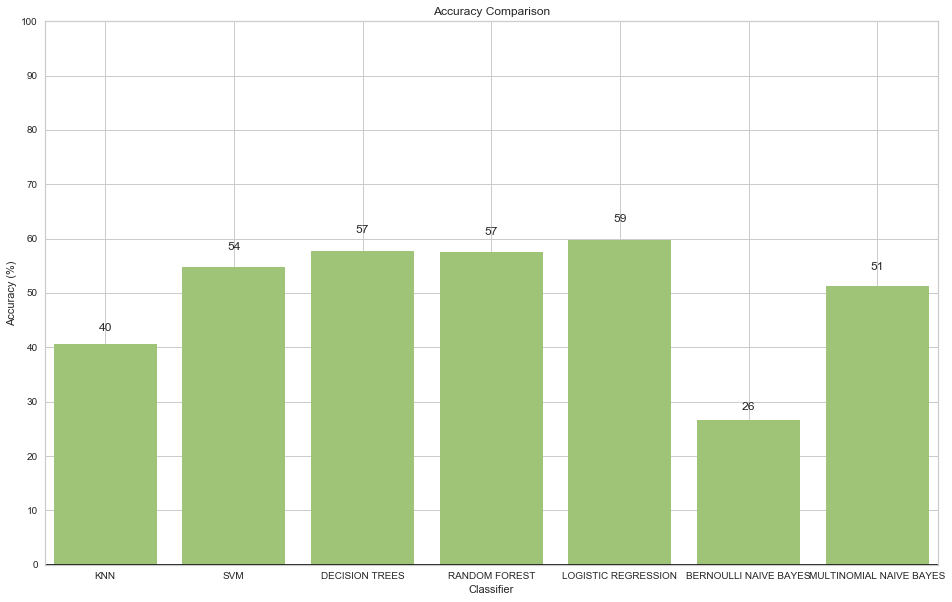

In [26]:
ind = np.arange(7)

plt.figure(figsize=(16, 10))

accbars = plt.bar(ind, [accuracy[value] for value in accuracy], color='g')
plt.axhline(0, color='black')
plt.margins(0.01)
plt.title('Accuracy Comparison')
plt.xticks(ind,('KNN', 'SVM', 'DECISION TREES', 'RANDOM FOREST', 'LOGISTIC REGRESSION', 'BERNOULLI NAIVE BAYES', 'MULTINOMIAL NAIVE BAYES'))
plt.yticks(np.linspace(0, 100, num=11))
plt.ylabel('Accuracy (%)')
plt.xlabel('Classifier')

autolabel(accbars)

plt.show()

# Model testing using 'Attribute_name' + 'sample_1-5'

In [27]:
cut = df.drop(['Record_id', 'Attribute_name', 'y_pred', 'y_act', 'mean_word_count', 'std_dev_word_count', 'has_delimeters',
               'Reason', 'total_vals', 'num_nans', '%_nans'], axis=1)
df['Corpus'] = [f'{row[1]} {row[2]} {row[3]} {row[4]} {row[5]} {row[6]}' for row in cut.itertuples()]
df['Corpus'] = [word_tokenize(entry) for entry in df['Corpus']]

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['Corpus']):
    final_words = []
    word_lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalnum():
            word_Final = word_lemmatized.lemmatize(word,tag_map[tag[0]])
            final_words.append(word_Final)
    df.loc[index,'text_final'] = str(final_words)

x = df['text_final']
y = df['y_act']

## Finding best hyper-parameters

In [28]:
sep = "================================================================"
# SVM
clf = svm.SVC()
params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
           'C': [1, 10, 100]}, {'kernel': ['linear'], 'C': [1, 10, 100]}]
get_param_report(x, y, clf, params, 'SVM')
print(sep)

# Decision Tree
clf = tree.DecisionTreeClassifier()
params = {'splitter': ['best', 'random'], 'max_depth': [
    30, 50, 100, 500], 'min_samples_split': [2, 10, 50, 100]}
get_param_report(x, y, clf, params, 'Decision Tree')
print(sep)

# Random Forest
clf = ensemble.RandomForestClassifier()
params = {'n_estimators': [5, 10, 50], 'criterion': [
    'gini', 'entropy'], 'max_depth': [30, 50, 100, 500, 1000]}
get_param_report(x, y, clf, params, 'Random Forest')
print(sep)

# Logistic Regression
clf = linear_model.LogisticRegression()
params = {'penalty': ['l1', 'l2'], 'C': [1.0, 1.5, 2.0]}
get_param_report(x, y, clf, params, 'Logistic Regression')
print(sep)

> Tuning hyper-parameters for SVM

> Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

> Grid scores on development set:

> 0.211 (+/-0.011) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.211 (+/-0.011) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.211 (+/-0.011) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.211 (+/-0.011) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.423 (+/-0.034) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
> 0.211 (+/-0.011) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
> 0.480 (+/-0.098) for {'C': 1, 'kernel': 'linear'}
> 0.498 (+/-0.089) for {'C': 10, 'kernel': 'linear'}
> 0.498 (+/-0.089) for {'C': 100, 'kernel': 'linear'}

> Detailed classification report:

> The model is trained on the full development set.
> The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.29      0.86      0.43        57
          1       1.00      0.29      0.44

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> Best parameters set found on development set:

{'max_depth': 100, 'min_samples_split': 10, 'splitter': 'random'}

> Grid scores on development set:

> 0.520 (+/-0.095) for {'max_depth': 30, 'min_samples_split': 2, 'splitter': 'best'}
> 0.520 (+/-0.088) for {'max_depth': 30, 'min_samples_split': 2, 'splitter': 'random'}
> 0.505 (+/-0.121) for {'max_depth': 30, 'min_samples_split': 10, 'splitter': 'best'}
> 0.541 (+/-0.090) for {'max_depth': 30, 'min_samples_split': 10, 'splitter': 'random'}
> 0.523 (+/-0.107) for {'max_depth': 30, 'min_samples_split': 50, 'splitter': 'best'}
> 0.545 (+/-0.120) for {'max_depth': 30, 'min_samples_split': 50, 'splitter': 'random'}
> 0.487 (+/-0.084) for {'max_depth': 30, 'min_samples_split': 100, 'splitter': 'best'}
> 0.487 (+/-0.054) for {'max_depth': 30, 'min_samples_split': 100, 'splitter': 'random'}
> 0.534 (+/-0.087) for {'max_depth': 50, 'min_samples_split': 2, 'splitter': 'best'}
> 0.534 (+/-0.089) for {'max_depth': 50, 'min_samples_split': 2, 'sp

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 50}

> Grid scores on development set:

> 0.498 (+/-0.182) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 5}
> 0.491 (+/-0.174) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 10}
> 0.513 (+/-0.134) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 50}
> 0.462 (+/-0.135) for {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 5}
> 0.520 (+/-0.145) for {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 10}
> 0.509 (+/-0.105) for {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 50}
> 0.498 (+/-0.122) for {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 5}
> 0.516 (+/-0.124) for {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 10}
> 0.509 (+/-0.105) for {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 50}
> 0.516 (+/-0.119) for {'criterion': 'gini', 'max_depth': 500, 'n_estimators': 5}
> 0.509 (+/-0.141) for {'criterio

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> Best parameters set found on development set:

{'C': 2.0, 'penalty': 'l2'}

> Grid scores on development set:

> 0.455 (+/-0.046) for {'C': 1.0, 'penalty': 'l1'}
> 0.509 (+/-0.097) for {'C': 1.0, 'penalty': 'l2'}
> 0.480 (+/-0.058) for {'C': 1.5, 'penalty': 'l1'}
> 0.491 (+/-0.081) for {'C': 1.5, 'penalty': 'l2'}
> 0.473 (+/-0.047) for {'C': 2.0, 'penalty': 'l1'}
> 0.559 (+/-0.171) for {'C': 2.0, 'penalty': 'l2'}

> Detailed classification report:

> The model is trained on the full development set.
> The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.37      0.88      0.52        57
          1       0.91      0.69      0.78        42
          2       0.84      0.44      0.57        62
          3       0.81      0.86      0.83        63
          4       1.00      0.82      0.90        17
          5       1.00      0.04      0.08        24
          6       0.00      0.00      0.00        10
          7  

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
accuracy = {}

# KNN
clf = neighbors.KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, n_neighbors=5)
accuracy['knn'] = test_mult(x, y, clf, 100)

# SVM
clf = svm.SVC(C=10, kernel='linear')
accuracy['svm'] = test_mult(x, y, clf, 100)

# Decision Tree
clf = tree.DecisionTreeClassifier(max_depth=50, min_samples_split=10, splitter='random')
accuracy['dt'] = test_mult(x, y, clf, 100)

# Random Forest
clf = ensemble.RandomForestClassifier(criterion='entropy', max_depth=500, n_estimators=50)
accuracy['rf'] = test_mult(x, y, clf, 100)

# Logistic Regression
clf = linear_model.LogisticRegression(C=2.0, penalty='l2')
accuracy['lr'] = test_mult(x, y, clf, 100)

# Naive Bayes (Bernoulli)
clf = naive_bayes.BernoulliNB()
accuracy['nb_b'] = test_mult(x, y, clf, 100)

# Naive Bayes (Multi)
clf = naive_bayes.MultinomialNB()
accuracy['nb_m'] = test_mult(x, y, clf, 100)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


## Comparing Accuracies

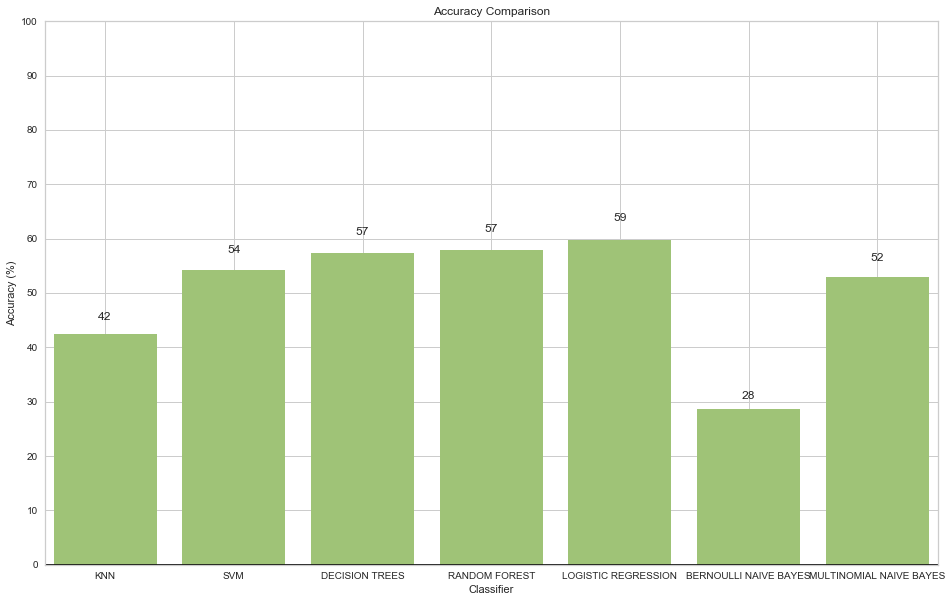

In [30]:
ind = np.arange(7)

plt.figure(figsize=(16, 10))

accbars = plt.bar(ind, [accuracy[value] for value in accuracy], color='g')
plt.axhline(0, color='black')
plt.margins(0.01)
plt.title('Accuracy Comparison')
plt.xticks(ind,('KNN', 'SVM', 'DECISION TREES', 'RANDOM FOREST', 'LOGISTIC REGRESSION', 'BERNOULLI NAIVE BAYES', 'MULTINOMIAL NAIVE BAYES'))
plt.yticks(np.linspace(0, 100, num=11))
plt.ylabel('Accuracy (%)')
plt.xlabel('Classifier')

autolabel(accbars)

plt.show()

# Comparison against pandas infer_dtype

## Info as stated by the *pandas* docs:
```
pandas.api.types.infer_dtype()
Efficiently infer the type of a passed val, or list-like array of values. Return a string describing the type.

Parameters:	
value : scalar, list, ndarray, or pandas type
skipna : bool, default False
Ignore NaN values when inferring the type.

New in version 0.21.0.

Returns:	
string describing the common type of the input data.
Results can include:
- string
- unicode
- bytes
- floating
- integer
- mixed-integer
- mixed-integer-float
- decimal
- complex
- categorical
- boolean
- datetime64
- datetime
- date
- timedelta64
- timedelta
- time
- period
- mixed
Raises:	
TypeError if ndarray-like but cannot infer the dtype
```

## Categories as pandas types
- Date:
    - date
    - datetime
    - datetime64
- Sentence:
    - string
- Custom Object:
    - mixed
    - categorical
    - boolean
    - unicode
- Unusable:
    - string
- URL:
    - string
- Numbers:
    - floating
    - mixed-integer
    - mixed-integer-float
    - decimal
    - complex
- List:
    - string
- Timestamp:
    - time
    - timedelta
    - timedelta64

In [31]:
def compare_against_infer(model_list, folder):
    path = f'data/needs_extraction_data/classified_csvs/infer_type'
    acc = {}
    for model in model_list:
        df = pd.read_csv(f'{path}/{folder}/{model}.csv')
        infers = df.pd_infer_type
        y_acts = list(df.y_act)
        correct = 0
        for row_index, val in infers.iteritems():
            if val in y_acts[row_index].split(' '):
                correct+=1 
        acc[model] = (correct/len(df))*100
    return acc

In [32]:
def map_cats(model_list, folder):
    path = f'data/needs_extraction_data/classified_csvs'
    mapping = {
        'Date' : "date datetime datetime64",
        'Sentence' : "string",
        'Custom Object' : "mixed categorical boolean unicode",
        'Unusable' : "string",
        'URL' : "string",
        'Numbers' : "floating mixed-integer mixed-integer-float decimal complex",
        'List' : "string",
        'Timestamp' : "time timedelta timedelta64"
    }
    for model in model_list:
        df = pd.read_csv(f'{path}/{folder}/{model}.csv')
        df.replace({'y_act' : mapping}, inplace=True)
        df.replace({'y_pred' : mapping}, inplace=True)
        df.to_csv(f'{path}/infer_type/{folder}/{model}.csv', index=False)

In [33]:
def cast_items(elements):
    count = 0
    for el in elements:
        try:
            elements[count] = pd.Timestamp(el)
            count += 1
            continue
        except ValueError:
            pass
            
        try:
            elements[count] = int(el)
            count += 1
            continue
        except ValueError:
            pass
            
        try:
            elements[count] = float(el)
            count += 1
            continue
        except ValueError:
            pass
        
        count += 1
    return elements


def add_infer(model_list, folder):
    path = f'data/needs_extraction_data/classified_csvs/infer_type/'
    for model in model_list:
        infer = []
        df = pd.read_csv(f'{path}{folder}/{model}.csv').fillna('NANVAL!')
        cut = df.drop(['Record_id', 'Attribute_name','y_pred','y_act','Reason','total_vals','num_nans','%_nans','mean_word_count','std_dev_word_count','has_delimeters'], axis=1)
        for samples in cut.itertuples():
            combined_samples = cast_items(list(samples)[1:])
            infer.append(pd.api.types.infer_dtype(combined_samples))

        df['pd_infer_type'] = infer
        df.to_csv(f'{path}{folder}/{model}.csv', index=False)

## Numerical Features

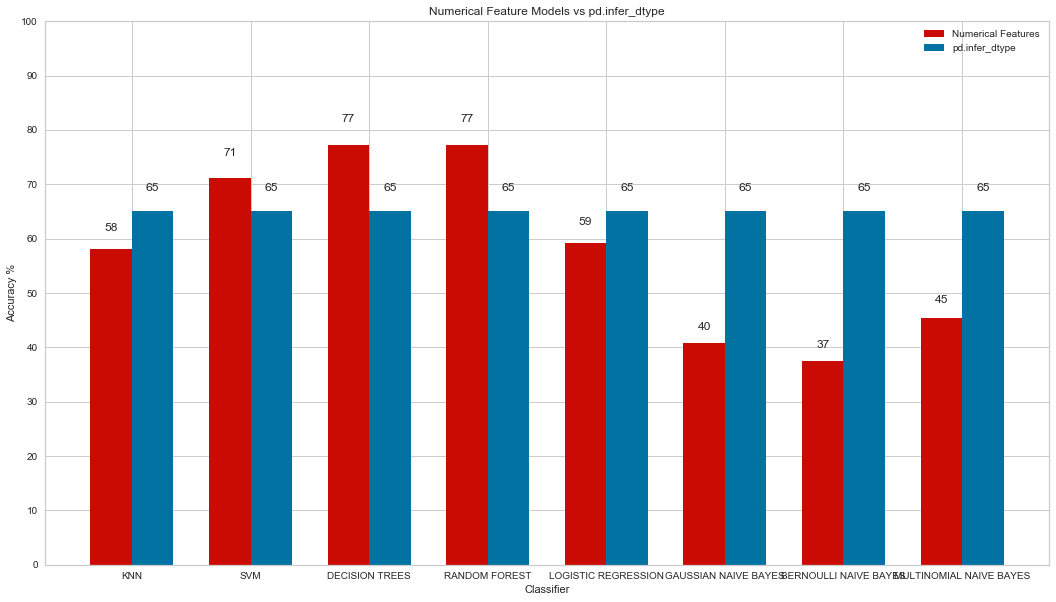

In [34]:
model_list = ['knn', 'svm', 'decision_tree', 'random_forest',
              'logistic_regression', 'gauss_naive_bayes', 'bern_naive_bayes', 'multinomial_naive_bayes']
map_cats(model_list, 'numerical_features_only')
add_infer(model_list, 'numerical_features_only')
accuracy = compare_against_infer(model_list, 'numerical_features_only')
ind = np.arange(8)

width = 0.35
fig, ax = plt.subplots(figsize=(18,10))
num_bar = ax.bar(ind, [float(x[1]) for x in accuracy_perc_num.items()], width, color='r')
pd_bar = ax.bar(ind + width,[float(x[1]) for x in accuracy.items()], width, color='b')

ax.set_title('Numerical Feature Models vs pd.infer_dtype')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Classifier')
ax.set_xticks(ind + width / 2)
ax.set_yticks(np.linspace(0, 100, num=11))
ax.set_xticklabels(['KNN', 'SVM', 'DECISION TREES', 'RANDOM FOREST', 'LOGISTIC REGRESSION',
                 'GAUSSIAN NAIVE BAYES', 'BERNOULLI NAIVE BAYES', 'MULTINOMIAL NAIVE BAYES'])

ax.legend((num_bar[0], pd_bar[0]), ('Numerical Features', 'pd.infer_dtype'))
autolabel(num_bar)
autolabel(pd_bar)
plt.show()

## Attribute Name Only

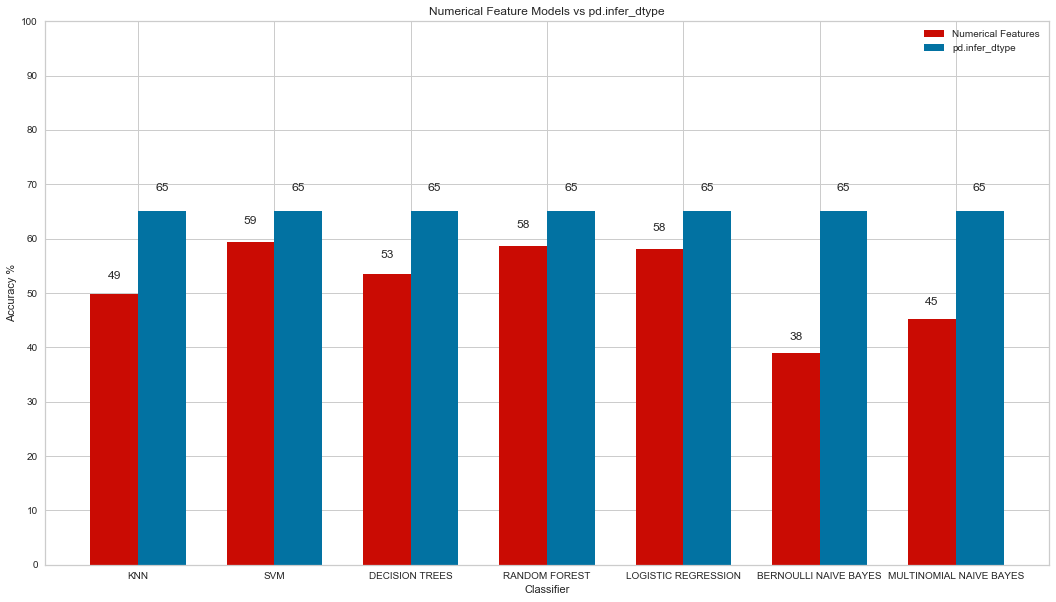

In [37]:
model_list = ['knn', 'svm', 'decision_tree', 'random_forest',
              'logistic_regression', 'bern_naive_bayes', 'multinomial_naive_bayes']
map_cats(model_list, 'attribute_name_only')
add_infer(model_list, 'attribute_name_only')
accuracy = compare_against_infer(model_list, 'attribute_name_only')
ind = np.arange(7)

width = 0.35
fig, ax = plt.subplots(figsize=(18,10))
num_bar = ax.bar(ind, [float(x[1]) for x in accuracy_perc_att.items()], width, color='r')
pd_bar = ax.bar(ind + width,[float(x[1]) for x in accuracy.items()], width, color='b')

ax.set_title('Numerical Feature Models vs pd.infer_dtype')
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Classifier')
ax.set_xticks(ind + width / 2)
ax.set_yticks(np.linspace(0, 100, num=11))
ax.set_xticklabels(['KNN', 'SVM', 'DECISION TREES', 'RANDOM FOREST', 'LOGISTIC REGRESSION', 
                   'BERNOULLI NAIVE BAYES', 'MULTINOMIAL NAIVE BAYES'])

ax.legend((num_bar[0], pd_bar[0]), ('Numerical Features', 'pd.infer_dtype'))
autolabel(num_bar)
autolabel(pd_bar)
plt.show()